In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

# Fitting KNNdir reg

In [3]:
query={'experiment':'knndir'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['n_neighbors'], data=['lag'])

In [4]:
a=results.exp_df.groupby(['site','n_neighbors','lag'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

1200

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7df3d3df28>,
      dtype=object)

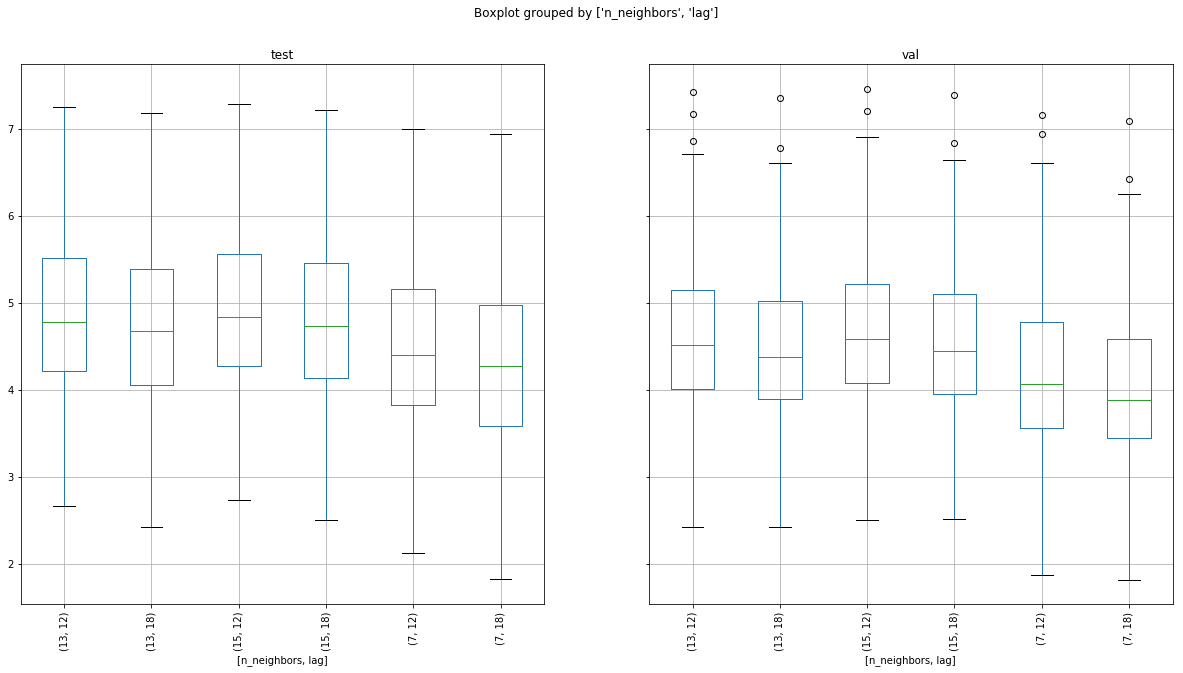

In [5]:
a.boxplot(by=['n_neighbors','lag'],figsize=(20,10), rot=90)

In [6]:
b =a.groupby(by=['n_neighbors','lag'],as_index=False).mean()
b.style.highlight_max()

,n_neighbors,lag,test,val
0,13,12,4.82823,4.58833
1,13,18,4.68665,4.44724
2,15,12,4.8857,4.65007
3,15,18,4.75014,4.51892
4,7,12,4.44486,4.17479
5,7,18,4.26379,3.98687


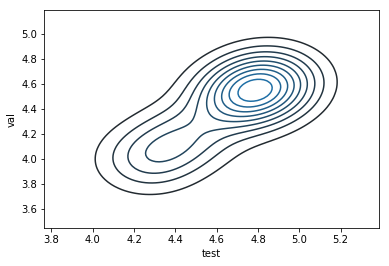

In [7]:
sns.kdeplot(b['test'],b['val'])

In [8]:
a.groupby(by=['n_neighbors','lag'],as_index=False).count()

,n_neighbors,lag,test,val
0,13,12,200,200
1,13,18,200,200
2,15,12,200,200
3,15,18,200,200
4,7,12,200,200
5,7,18,200,200
